# Non-parametric Statistics 
## Chapter 3.3: Splines
### Use of Different Degrees

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

%matplotlib inline

In [3]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap3/splines")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/adam/Desktop/Edinburgh/y4/MP/nonparam-stats-proj/plots/chap3/splines'

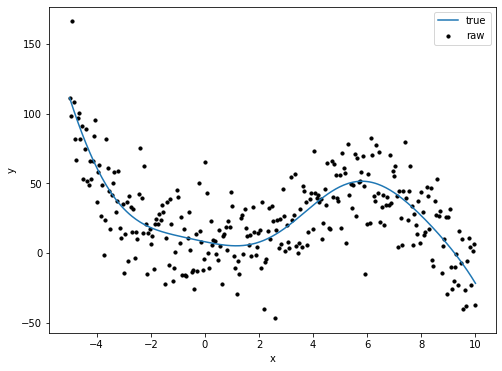

In [11]:
# generate data
x = np.linspace(-5, 10, 300)
data = x + 3*x**2 - 1/3*x**3 + 5*np.cos(x) - 5*np.sin(x) + 3 + np.random.normal(0, 20, size = 300)
true = x + 3*x**2 - 1/3*x**3 + 5*np.cos(x) - 5*np.sin(x) + 3

plt.figure(figsize=(8, 6))
plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.show()

In [12]:
transformed_x = dmatrix("bs(x, knots=(0,5), degree=3, include_intercept=False)",
                        {"x": x}, return_type='dataframe')
transformed_x2 = dmatrix("bs(x, knots=(0,5), degree=1, include_intercept=False)",
                        {"x": x}, return_type='dataframe')
transformed_x
transformed_x2

,Intercept,"bs(x, knots=(0, 5), degree=1, include_intercept=False)[0]","bs(x, knots=(0, 5), degree=1, include_intercept=False)[1]","bs(x, knots=(0, 5), degree=1, include_intercept=False)[2]"
0,1.0,0.000000,0.000000,0.000000
1,1.0,0.010033,0.000000,0.000000
2,1.0,0.020067,0.000000,0.000000
3,1.0,0.030100,0.000000,0.000000
4,1.0,0.040134,0.000000,0.000000
...,...,...,...,...
295,1.0,0.000000,0.040134,0.959866
296,1.0,0.000000,0.030100,0.969900
297,1.0,0.000000,0.020067,0.979933
298,1.0,0.000000,0.010033,0.989967


In [13]:
fit = sm.GLM(data, transformed_x).fit()
fit2 = sm.GLM(data, transformed_x2).fit()

In [14]:
fit.params
fit2.params

Intercept                                                    76.121600
bs(x, knots=(0, 5), degree=1, include_intercept=False)[0]   -84.732661
bs(x, knots=(0, 5), degree=1, include_intercept=False)[1]   -24.945505
bs(x, knots=(0, 5), degree=1, include_intercept=False)[2]   -77.746744
dtype: float64

In [15]:
pred = fit.predict(transformed_x)
pred2= fit2.predict(transformed_x2)
pred
pred2

0      76.121600
1      75.271440
2      74.421279
3      73.571119
4      72.720958
         ...    
295     0.493970
296    -0.035809
297    -0.565587
298    -1.095365
299    -1.625144
Length: 300, dtype: float64

<Figure size 432x288 with 0 Axes>

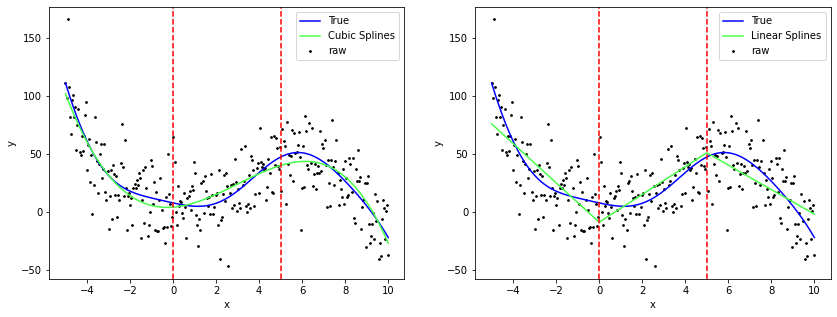

In [16]:
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(x, true, label="True", c='blue')
axs[0].scatter(x, data, label="raw", c='black', s=3)
axs[0].plot(x, pred, label="Cubic Splines", c='#47ff47')
axs[0].axvline(x=0, color='r', linestyle='--')
axs[0].axvline(x=5, color='r', linestyle='--')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend(loc="upper right")


axs[1].plot(x, true, label="True", c='blue')
axs[1].scatter(x, data, label="raw", c="black", s=3)
axs[1].plot(x, pred2, label="Linear Splines", c='#47ff47')
axs[1].axvline(x=0, color='r', linestyle='--')
axs[1].axvline(x=5, color='r', linestyle='--')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend(loc="upper right")
plt.savefig(os.path.join(plots_folder, f"example-splines.png"))

plt.show()